# Stroke Prediction Model
- A stroke is the 2nd leading cause of death, responsible for ~11% of deaths worldwide (WHO, 2020)
- "A stroke occurs when a blood vessel that carries oxygen and nutrients to the brain is either blocked by a clot or bursts (or ruptures). When that happens, part of the brain cannot get the blood (and oxygen) it needs, so it and brain cells die." (American Stroke Association)
- ~80% of strokes are preventable (American Stroke Association)
- The effects of a stroke strongly affect the patient's everyday life, ranging from speech & language problems to paralysis.
- Dataset used: 

In [1]:
# import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Data Processing

In [2]:
# import dataset
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# some columns are unnecessary, so drop them
stroke_data = stroke_data.drop('id', axis=1)
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# get the unique values in each column (except age, bmi, avg_glucose_level - they are continuous)
labels = ['gender', 'hypertension', 'heart_disease','ever_married', 'work_type', 'Residence_type', 'smoking_status']
for label in labels:
    print(label + ":", stroke_data[label].unique())

gender: ['Male' 'Female' 'Other']
hypertension: [0 1]
heart_disease: [1 0]
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [5]:
# "unknown" in smoking_status is technically a missing value
stroke_data['smoking_status'].replace('Unknown', np.nan, inplace=True)

# check for missing values
stroke_data.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [6]:
# there are a lot of missing values, so replace them instead of removing
stroke_data['bmi'].fillna(stroke_data['bmi'].mean(), inplace=True)
stroke_data['smoking_status'].fillna(stroke_data['smoking_status'].mode()[0], inplace = True)

# Data Visualisation

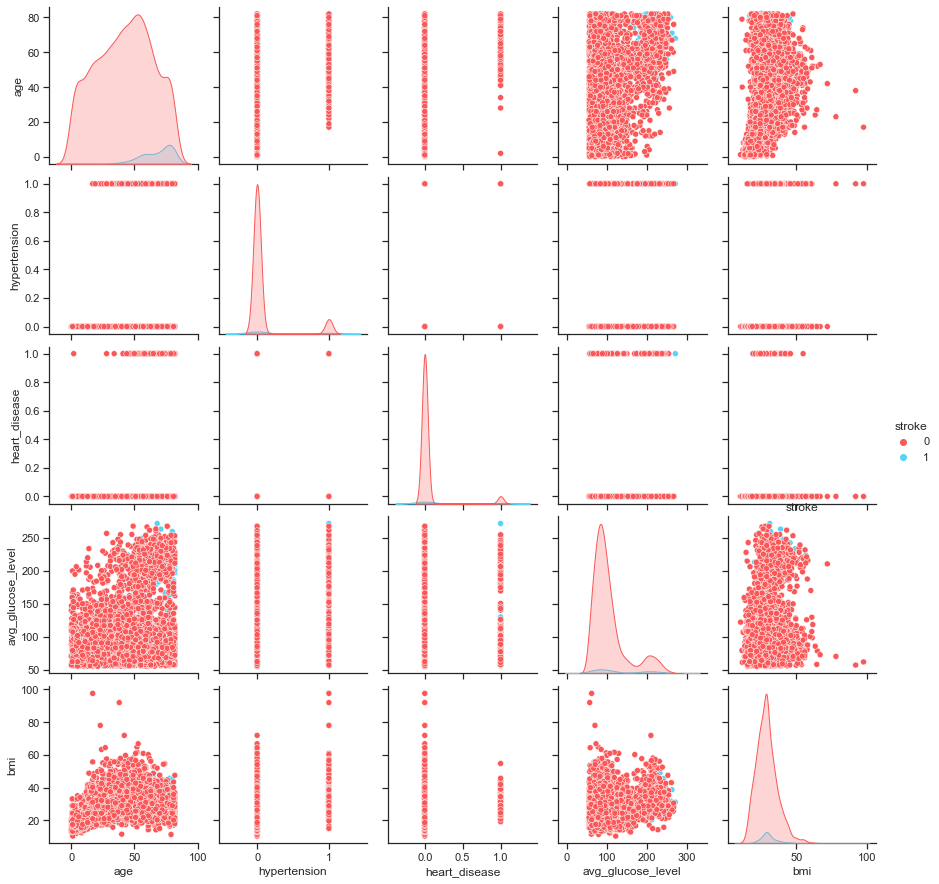

In [7]:
# pairplot
sns.set(style="ticks");
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(stroke_data, hue="stroke", palette=pal);
plt.title("stroke");

C:\Users\65945\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

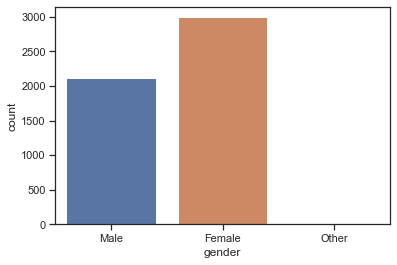

In [8]:
sns.countplot(stroke_data['gender'])

C:\Users\65945\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

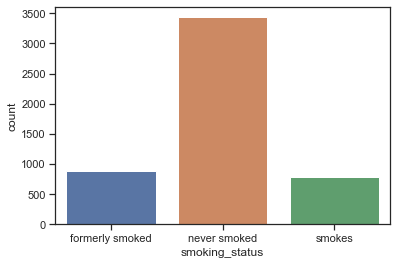

In [9]:
sns.countplot(stroke_data['smoking_status'])

C:\Users\65945\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

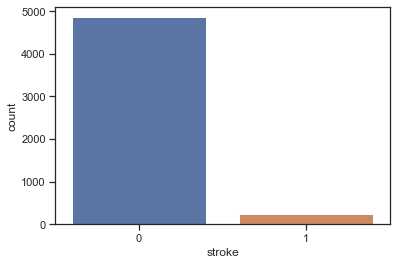

In [10]:
sns.countplot(stroke_data['stroke'])

C:\Users\65945\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

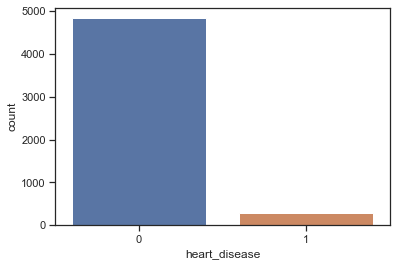

In [11]:
sns.countplot(stroke_data['heart_disease'])

<AxesSubplot:>

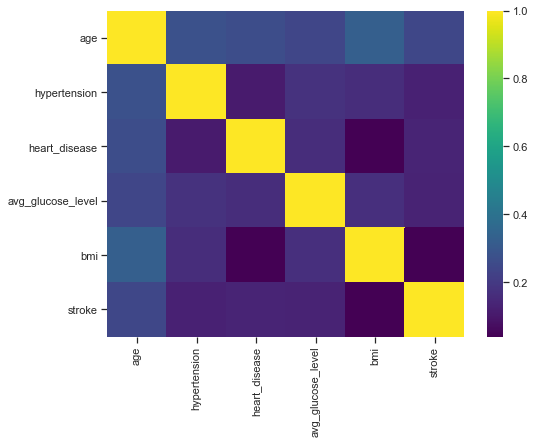

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(stroke_data.corr(), cmap = 'viridis')

# Convert Data

In [13]:
# convert categorical data to numerical data
encoder = LabelEncoder()
stroke_data = stroke_data.apply(encoder.fit_transform)
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,0,1
1,0,82,0,0,1,3,0,3588,162,1,1
2,1,101,0,1,1,2,0,2483,199,1,1
3,0,70,0,0,1,2,1,3385,218,2,1
4,0,100,1,0,1,3,0,3394,113,1,1


In [14]:
# separate features & the target value
X = stroke_data.drop('stroke', axis = 1)
y = stroke_data['stroke']

#split data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [15]:
# train the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
prediction = rf.predict(X_test)

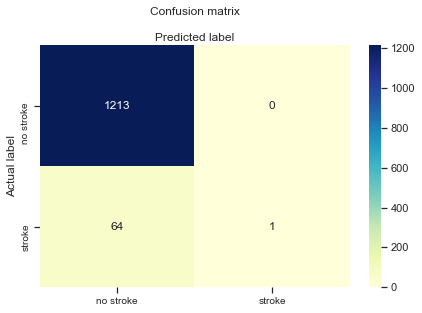

In [16]:
# create a confusion matrix to visualise accuracy
matrix = confusion_matrix(y_test, prediction)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticklabels(['no stroke','stroke'], fontsize = 10)
ax.yaxis.set_ticklabels(['no stroke', 'stroke'], fontsize = 10)
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [17]:
# training & accuracy score
print("Training Score: {:.3f}%".format(rf.score(X_train, y_train)*100))
print("Accuracy Score: {:.3f}%".format(accuracy_score(y_test, prediction)*100))

Training Score: 100.000%
Accuracy Score: 94.992%
